In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
pyplot.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140,3449,10.5,70,usa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    int64  
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# Memeriksa apakah ada nilai yang hilang
print(df[['mpg', 'horsepower','cylinders','displacement','weight', 'acceleration', 'model_year', 'origin']].isnull().sum())

df = df[['mpg', 'horsepower','cylinders','displacement','weight', 'acceleration', 'model_year', 'origin']].dropna()
print(df.columns)

mpg             0
horsepower      0
cylinders       0
displacement    0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64
Index(['mpg', 'horsepower', 'cylinders', 'displacement', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')


In [ ]:
# Menghapus kolom 'name' jika ada
if 'name' in df.columns:
    df.drop(columns=['name'], inplace=True)

# Menampilkan DataFrame untuk memastikan kolom terhapus (jika ada)
df

,mpg,horsepower,cylinders,displacement,weight,acceleration,model_year,origin
0,18.0,130,8,307.0,3504,12.0,70,usa
1,15.0,165,8,350.0,3693,11.5,70,usa
2,18.0,150,8,318.0,3436,11.0,70,usa
3,16.0,150,8,304.0,3433,12.0,70,usa
4,17.0,140,8,302.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,86,4,140.0,2790,15.6,82,usa
394,44.0,52,4,97.0,2130,24.6,82,europe
395,32.0,84,4,135.0,2295,11.6,82,usa
396,28.0,79,4,120.0,2625,18.6,82,usa


STATISTIKA DESKRIPTIF + VISUALISASI

In [ ]:
df.describe()

,mpg,horsepower,cylinders,displacement,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,104.278894,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,38.570490,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,46.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,75.000000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,92.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,125.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,230.000000,8.000000,455.000000,5140.000000,24.800000,82.000000


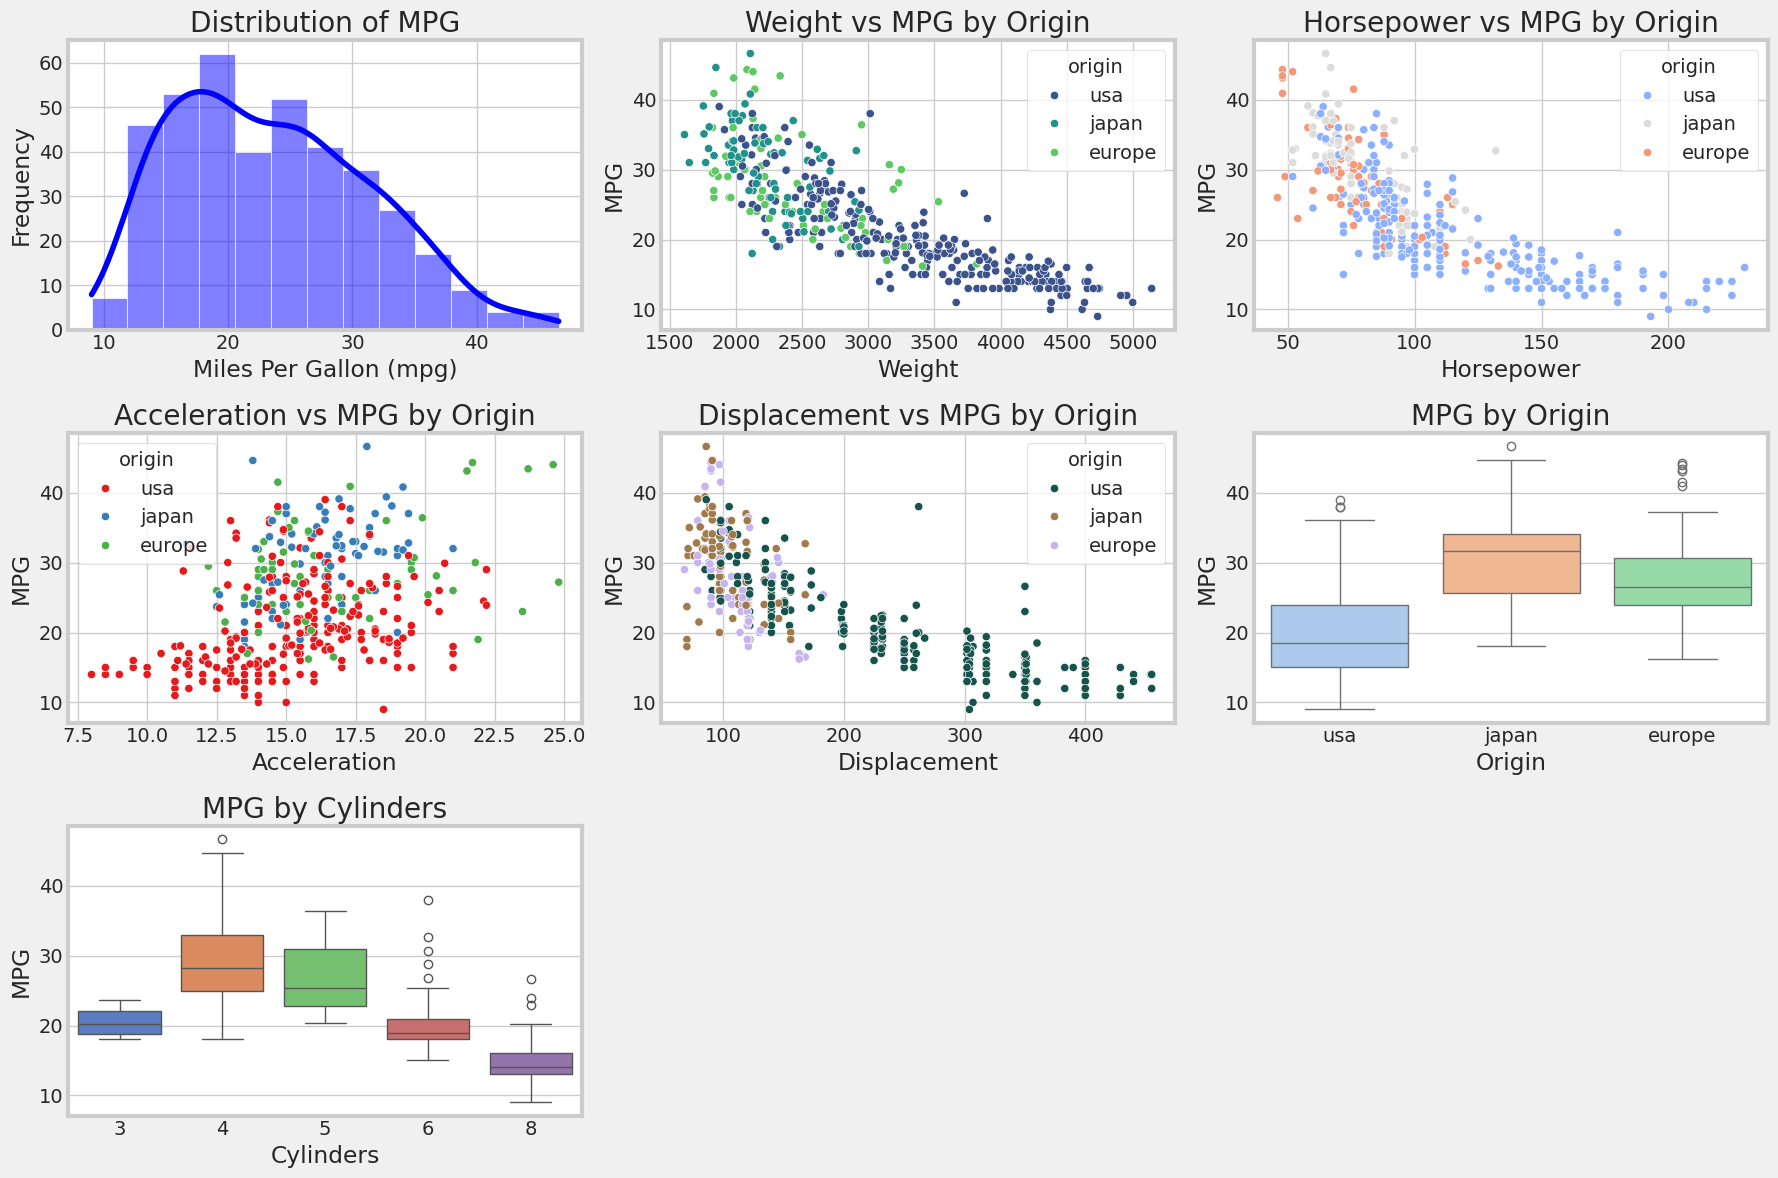

In [ ]:
# Univariate and Bivariate Analysis with mpg as the target variable

# Plot Setup
plt.figure(figsize=(18, 12))
sns.set_style("whitegrid")

# Visualization 1: Distribution of MPG (Miles Per Gallon)
plt.subplot(3, 3, 1)
sns.histplot(df['mpg'], kde=True, color='blue')
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Frequency')

# Visualization 2: Scatter plot of Weight vs MPG
plt.subplot(3, 3, 2)
sns.scatterplot(data=df, x='weight', y='mpg', hue='origin', palette='viridis')
plt.title('Weight vs MPG by Origin')
plt.xlabel('Weight')
plt.ylabel('MPG')

# Visualization 3: Scatter plot of Horsepower vs MPG
plt.subplot(3, 3, 3)
sns.scatterplot(data=df, x='horsepower', y='mpg', hue='origin', palette='coolwarm')
plt.title('Horsepower vs MPG by Origin')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Visualization 4: Scatter plot of Acceleration vs MPG
plt.subplot(3, 3, 4)
sns.scatterplot(data=df, x='acceleration', y='mpg', hue='origin', palette='Set1')
plt.title('Acceleration vs MPG by Origin')
plt.xlabel('Acceleration')
plt.ylabel('MPG')

# Visualization 5: Scatter plot of Displacement vs MPG
plt.subplot(3, 3, 5)
sns.scatterplot(data=df, x='displacement', y='mpg', hue='origin', palette='cubehelix')
plt.title('Displacement vs MPG by Origin')
plt.xlabel('Displacement')
plt.ylabel('MPG')

# Visualization 6: Boxplot of MPG by Origin
plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='origin', y='mpg', palette='pastel')
plt.title('MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')

# Visualization 7: Boxplot of MPG by Cylinders
plt.subplot(3, 3, 7)
sns.boxplot(data=df, x='cylinders', y='mpg', palette='muted')
plt.title('MPG by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')


plt.tight_layout()
plt.show()

Menghitung Korelasi Menggunakan Heatmap

In [ ]:
# Convert 'origin' column to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['origin'], prefix=['origin'])

# Calculate correlation
correlation = df.corr()
correlation

,mpg,horsepower,cylinders,displacement,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.776867,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.259022,0.442174,-0.568192
horsepower,-0.776867,1.000000,0.840897,0.893685,0.860028,-0.680214,-0.418124,-0.291160,-0.315771,0.489296
cylinders,-0.775396,0.840897,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.352861,-0.396479,0.604351
displacement,-0.804203,0.893685,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.373886,-0.433505,0.651407
weight,-0.831741,0.860028,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.298843,-0.440817,0.598398
acceleration,0.420289,-0.680214,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.204473,0.109144,-0.250806
model_year,0.579267,-0.418124,-0.348746,-0.370164,-0.306564,0.288137,1.000000,-0.024489,0.193101,-0.139883
origin_europe,0.259022,-0.291160,-0.352861,-0.373886,-0.298843,0.204473,-0.024489,1.000000,-0.229895,-0.597198
origin_japan,0.442174,-0.315771,-0.396479,-0.433505,-0.440817,0.109144,0.193101,-0.229895,1.000000,-0.643317
origin_usa,-0.568192,0.489296,0.604351,0.651407,0.598398,-0.250806,-0.139883,-0.597198,-0.643317,1.000000


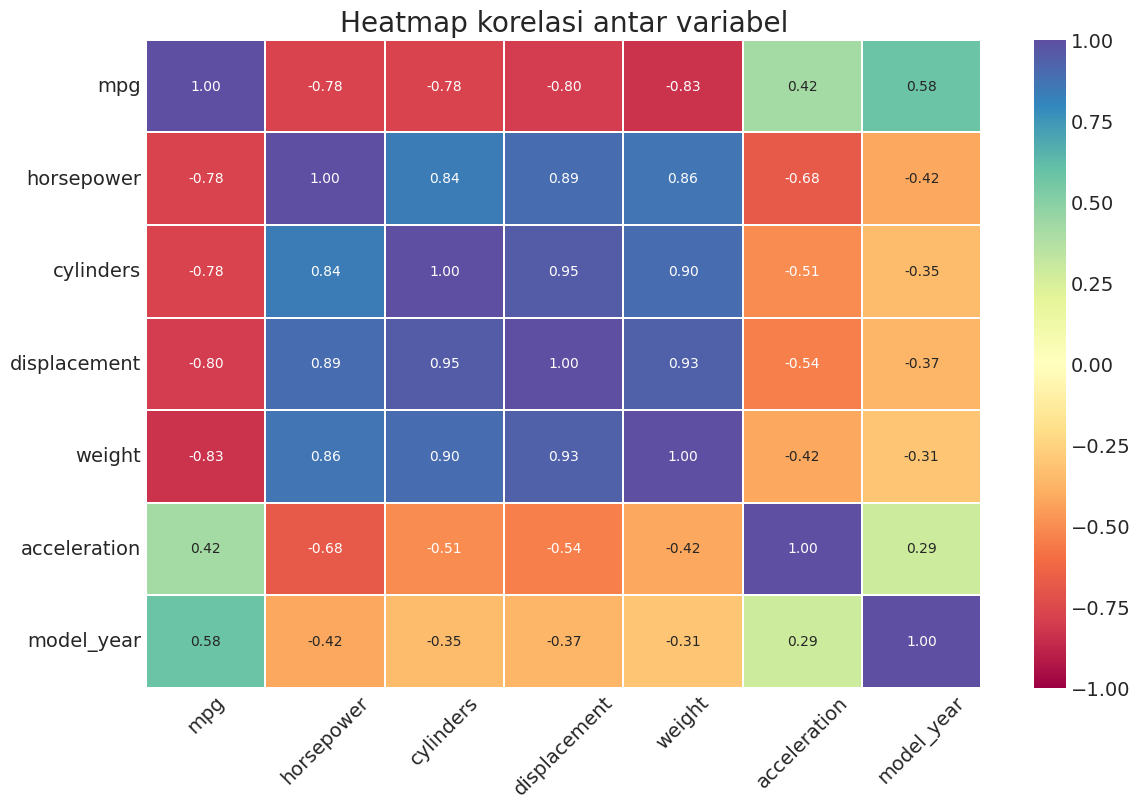

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung matriks korelasi
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="Spectral",
    vmin=-1,
    vmax=1,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    linewidths=0.1,
    annot_kws={"size": 10}
)
plt.xticks(rotation=45)
plt.title("Heatmap korelasi antar variabel")
plt.show()

# Analisis Regresi DUMMY

In [ ]:
df.rename(columns = {"cylinders" : "x1", "displacement" : "x2", "horsepower" : "x3", "weight" : "x4", "acceleration" : "x5", "model_year" : "x6", "origin" : "x7", "mpg" : "y"}, inplace = True)
df.head()

,y,x3,x1,x2,x4,x5,x6,origin_europe,origin_japan,origin_usa
0,18.0,130,8,307.0,3504,12.0,70,False,False,True
1,15.0,165,8,350.0,3693,11.5,70,False,False,True
2,18.0,150,8,318.0,3436,11.0,70,False,False,True
3,16.0,150,8,304.0,3433,12.0,70,False,False,True
4,17.0,140,8,302.0,3449,10.5,70,False,False,True


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Pastikan dataset sudah bersih tanpa kolom yang tidak relevan (contohnya 'name')
# dan kolom kategoris sudah diubah menjadi dummy variables

# Mengimpor dataset (ganti 'data.csv' dengan file dataset Anda)
data = pd.read_csv('Automobile.csv')

# Pastikan kolom 'origin' menjadi dummy variables jika diperlukan
data_cleaned = pd.get_dummies(data.drop(columns=['name']), drop_first=True)

# Define formula dinamically (semua kolom kecuali 'mpg' dianggap sebagai prediktor)
independent_vars = " + ".join(data_cleaned.columns.drop('mpg'))  # Semua variabel kecuali target 'mpg'
formula = f'mpg ~ {independent_vars}'

# Fit model regresi menggunakan Ordinary Least Squares (OLS)
model = smf.ols(formula=formula, data=data_cleaned).fit()

# Menampilkan ringkasan regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     229.1
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          4.61e-142
Time:                        13:46:37   Log-Likelihood:                -1035.8
No. Observations:                 398   AIC:                             2090.
Df Residuals:                     389   BIC:                             2126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -15.2366 

Y Topi =β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5 + β6X6 + β7X7 + β8X8

MPG = -15.2366 + 0.0831(x1) - 2.7909(x2) - 0.4275(x3) + 0.0243(x4) - 0.0182(x5) - 0.0069(x6) + 0.0795(x7) + 0.7783(x8)

In [ ]:
# Define x as the independent variables from your dataset
x = data_cleaned.drop(columns=['mpg']) # Drop the target variable 'mpg' since it's not an input for prediction

# Membentuk nilai prediksi
prediksi = model.predict(x)
print(prediksi.head())

0    15.034959
1    14.105398
2    15.324833
3    15.084337
4    14.989059
dtype: float64


In [ ]:
# Membentuk nilai residual
residual = model.resid
print(residual.head())

0    2.965041
1    0.894602
2    2.675167
3    0.915663
4    2.010941
dtype: float64


In [ ]:
from scipy.stats import f
F_hit = model.fvalue
df_model = model.df_model
df_resid = model.df_resid
alpha = 0.05
F_tabel = f.ppf(1 - alpha, df_model, df_resid)
# Menampilkan hasil dari uji f
print('Hasil dari F hitung adalah', round(F_hit,4))
print('Hasil dari F tabel adalah', round(F_tabel,4))

Hasil dari F hitung adalah 229.0983
Hasil dari F tabel adalah 1.9622


In [ ]:
# Converting the 'origin' column from categorical to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'origin' column
data['origin_encoded'] = label_encoder.fit_transform(data['origin'])

# Display the unique values in 'origin' and their corresponding encoded values
origin_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

data.head(), origin_mapping


(                        name   mpg  cylinders  displacement  horsepower  \
 0  chevrolet chevelle malibu  18.0          8         307.0         130   
 1          buick skylark 320  15.0          8         350.0         165   
 2         plymouth satellite  18.0          8         318.0         150   
 3              amc rebel sst  16.0          8         304.0         150   
 4                ford torino  17.0          8         302.0         140   
 
    weight  acceleration  model_year origin  origin_encoded  
 0    3504          12.0          70    usa               2  
 1    3693          11.5          70    usa               2  
 2    3436          11.0          70    usa               2  
 3    3433          12.0          70    usa               2  
 4    3449          10.5          70    usa               2  ,
 {'europe': 0, 'japan': 1, 'usa': 2})

In [ ]:
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Prepare the data
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded']]
y = data['mpg']

# Add a constant for the intercept
X = sm.add_constant(X)

# Handle missing or infinite values in 'X' and align 'y'
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]

# Create the OLS model
model = sm.OLS(y, X).fit()

# Extract t-statistics and p-values
t_stats = model.tvalues
p_values = model.pvalues

# Print t-test results for each coefficient
print("\nUji T untuk setiap koefisien:")
for var, t_stat, p_value in zip(X.columns, t_stats, p_values):
    print(f"Koefisien {var}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Determine the significance level
alpha = 0.05

# Compute t-table value for two-sided test
n = len(data)  # Total number of observations
df1 = n - X.shape[1]  # Degrees of freedom

t_tabel = stats.t.ppf(1 - alpha / 2, df1)
print(f"\nNilai t-tabel : {t_tabel:.4f}")

# Decision for each coefficient
for var, t_stat, p_value in zip(X.columns, t_stats, p_values):
    if abs(t_stat) > t_tabel:
        print(f"Tolak H0 untuk koefisien {var}, terdapat pengaruh signifikan.")
    else:
        print(f"Gagal tolak H0 untuk koefisien {var}, tidak terdapat pengaruh signifikan.")



Uji T untuk setiap koefisien:
Koefisien const: t-statistic = -3.4464, p-value = 0.0006
Koefisien cylinders: t-statistic = -1.0779, p-value = 0.2817
Koefisien displacement: t-statistic = 2.7520, p-value = 0.0062
Koefisien horsepower: t-statistic = -0.9147, p-value = 0.3609
Koefisien weight: t-statistic = -11.1863, p-value = 0.0000
Koefisien acceleration: t-statistic = 0.7856, p-value = 0.4326
Koefisien model_year: t-statistic = 15.4768, p-value = 0.0000
Koefisien origin_encoded: t-statistic = -5.0818, p-value = 0.0000

Nilai t-tabel : 1.9661
Tolak H0 untuk koefisien const, terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien cylinders, tidak terdapat pengaruh signifikan.
Tolak H0 untuk koefisien displacement, terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien horsepower, tidak terdapat pengaruh signifikan.
Tolak H0 untuk koefisien weight, terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien acceleration, tidak terdapat pengaruh signifikan.
Tolak H0 untuk koefi

In [ ]:
# Prepare the independent variables, including 'origin_encoded'
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded']]
y = data['mpg']  # Dependent variable

# Add a constant for the intercept
X = sm.add_constant(X)

# Handle missing or infinite values in 'X' and align 'y'
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]

# Create the OLS model
model = sm.OLS(y, X).fit()

# Extract regression coefficients
coefficients = model.params

# Predict y values
y_pred = model.predict(X)

# Calculate SST (Total Sum of Squares)
mean_y = np.mean(y)
sst = np.sum((y - mean_y) ** 2)

# Calculate SSR (Regression Sum of Squares)
ssr = np.sum((y_pred - mean_y) ** 2)

# Calculate SSE (Residual Sum of Squares)
sse = np.sum((y - y_pred) ** 2)

# Calculate R-squared (Coefficient of Determination)
r_squared = model.rsquared

# Output results in a structured way
print(f"Total Sum of Squares (SST): {sst:.4f}")
print(f"Regression Sum of Squares (SSR): {ssr:.4f}")
print(f"Residual Sum of Squares (SSE): {sse:.4f}")
print(f"R-squared: {r_squared:.4f}")
print("\nRegression Coefficients:")
for variable, coefficient in coefficients.items():
    print(f"{variable}: {coefficient:.4f}")


Total Sum of Squares (SST): 24252.5755
Regression Sum of Squares (SSR): 19901.8061
Residual Sum of Squares (SSE): 4350.7694
R-squared: 0.8206

Regression Coefficients:
const: -15.7427
cylinders: -0.3455
displacement: 0.0209
horsepower: -0.0117
weight: -0.0071
acceleration: 0.0747
model_year: 0.7954
origin_encoded: -1.4219


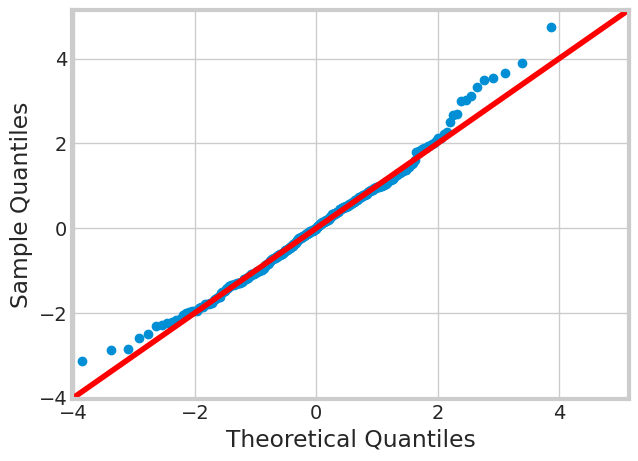

In [ ]:
# memeriksa asumsi residual berdistribusi normal

import scipy.stats as stats

fig = sm.qqplot(residual, stats.t, fit=True, line="45")
plt.show()

In [ ]:
# Pengujian Jarque Bera untuk memeriksa asumsi residual
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name,test)

[('Jarque-Bera', 28.76059051857472),
 ('Chi^2 two-tail prob.', 5.684825271188404e-07),
 ('Skew', 0.4171809762912628),
 ('Kurtosis', 4.018895037786955)]

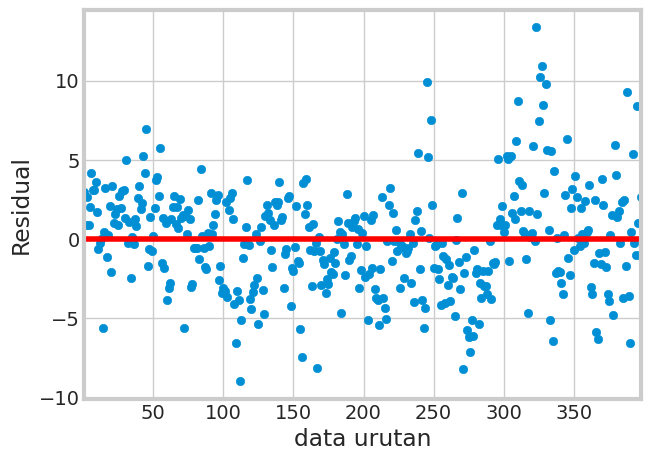

In [ ]:
# memeriksa asumsi residual tidak terjadi autokorelasi

import pandas as pd
import matplotlib.pyplot as plt
urutan_pengamatan = pd.Series(range(1, len(residual) + 1))  # Create a Series with the same length as 'residual'
plt.scatter(urutan_pengamatan, residual)
plt.axhline(0, color='red')
plt.xlabel('data urutan')
plt.ylabel('Residual')
plt.xlim([1, len(residual)])  # Adjust xlim based on the length of 'residual'
plt.show()

In [ ]:
# Pengujian Durbin-Watson
from statsmodels.stats.stattools import durbin_watson

# Hipotesis null dan hipotesis alternatif
H0 = 'tidak terjadi autokorelasi'
H1 = 'terjadi autokorelasi'

# Menentukan level signifikansi
alpha = 0.05

# Menentukan statistik uji
dw = durbin_watson(model.resid)
print(f'Durbin-Watson: {dw}')

Durbin-Watson: 1.2342543724628734


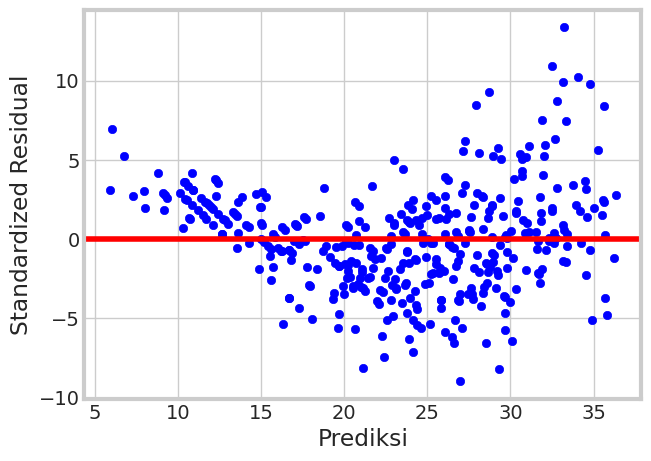

[('Lagrange multiplier statistic', 37.09071555513252), ('p-value', 4.508663851144924e-06), ('f-value', 5.72576770077975), ('f p-value', 2.5498469634771543e-06)]


In [ ]:
# memeriksa asumsi residual tidak terjadi heteroskedastisitas

import numpy as np
import statsmodels.stats.diagnostic as sms
import matplotlib.pyplot as plt

# Menghapus nilai NaN dari residual dan prediksi
mask = ~np.isnan(residual) & ~np.isnan(prediksi)  # Membuat masker yang menghilangkan NaN
residual_std_clean = residual[mask]  # Data residual yang sudah dibersihkan dari NaN
prediksi_clean = prediksi[mask]  # Data prediksi yang sudah dibersihkan dari NaN

# Scatter Plot untuk visualisasi setelah menghapus NaN
plt.scatter(prediksi_clean, residual_std_clean, color='blue')
plt.axhline(0, color='red')
plt.xlabel('Prediksi')
plt.ylabel('Standardized Residual')
plt.show()

# Menghapus NaN dari residual dan data exogenous sebelum uji Breusch-Pagan
valid_data = ~np.isnan(model.resid) & ~np.isnan(model.model.exog).any(axis=1)  # Masker untuk residual dan exogenous
residual_valid = model.resid[valid_data]
exog_valid = model.model.exog[valid_data]

# Pengujian Breusch-Pagan pada data yang valid (tanpa NaN)
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residual_valid, exog_valid)

# Menampilkan hasil uji Breusch-Pagan
result = list(zip(name, test))
print(result)


In [ ]:
# pengujian breush pagan

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('lagrange multiplier statistic', 37.09071555513252),
 ('p-value', 4.508663851144924e-06),
 ('f-value', 5.72576770077975),
 ('f p-value', 2.5498469634771543e-06)]

In [ ]:
# Uji Asumsi Multikoleniaritas

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

          feature         VIF
0       cylinders  115.464083
1    displacement   98.314747
2      horsepower   56.672012
3          weight  134.221991
4    acceleration   65.947415
5      model_year  109.959202
6  origin_encoded    7.498561
          feature         VIF
0       cylinders  115.464083
1    displacement   98.314747
2      horsepower   56.672012
3          weight  134.221991
4    acceleration   65.947415
5      model_year  109.959202
6  origin_encoded    7.498561
